# Animated Scatterplot

Using Gapminder Data: How did fertility and life expectancy evolve for countries all over the world since 1960?

--> Generate an animated scatterplot 

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
!pip install imageio
import imageio

## Loading Data from 3 sources
- worldwide fertility rate data
- worldwide life expectancy data
- worldwide population data

In [4]:
# loading data, first column as index
fert = pd.read_csv('gapminder_total_fertility.csv', index_col=0)
life = pd.read_excel('gapminder_lifeexpectancy.xlsx', index_col=0)
pop = pd.read_excel('gapminder_population.xlsx', index_col=0, nrows=260)     # limiting the number of rows to 260
pop.head(3)

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# loading extra data on countries and continents
cont = pd.read_csv('continents.csv', sep=';')
cont.head(3)

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin


## Data overview

In [6]:
fert.shape, life.shape, pop.shape

((260, 216), (260, 217), (260, 91))

In [7]:
print (f'{fert.columns}\n\n {life.columns}\n\n {pop.columns}')

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

 Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)

 Index([         1800,          1810,          1820,          1830,
                1840,          1850,          1860,          1870,
                1880,          1890,          1900,          1910,
                1920,          1930,          1940,          1950,
                1951,          1952,          1953,          1954,
                1955,          1956,          1957,          1958,
                1959,          1960,          1961,          1962,
                1963,          1964,          1965,          1966,
                1967,      

## Cleaning / Harmonizing Column-Names and Index

In [8]:
# removing all unnamed columns in pop
pop.drop(pop.filter(like='Unnamed'), axis=1, inplace=True)
pop.head(3)

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# adjusting column names of fert (strings to integers)
fert.columns = fert.columns.astype(int)
fert.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

In [10]:
# adjusting the index name
fert.index.name='country'
life.index.name='country'
pop.index.name='country'

## Melt wide tables into long format tables

In [11]:
# first, creating a row index as the first column (cont is already in long format)
fert = fert.reset_index()
life = life.reset_index()
pop = pop.reset_index()
pop.head(3)

,country,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#use melt function for the conversion:
fert_long = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')
life_long = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')
pop_long = pop.melt(id_vars='country', var_name='year', value_name='population_size')
pop_long.head(5)

,country,year,population_size
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000.0
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,410445.0
4,Algeria,1800,2503218.0


## Merging 3 Data Frames

In [13]:
df = pd.merge(fert_long, pop_long, on=['country', 'year'])
df = pd.merge(df, life_long, on=['country', 'year'])
df = pd.merge(df, cont, on='country', how='outer')

In [14]:
# random spot check
df.loc[150:155]

,country,year,fertility_rate,population_size,life_expectancy,continent
150,Afghanistan,2004,7.14,23499850.0,51.8,Asia
151,Afghanistan,2005,6.93,24399948.0,52.0,Asia
152,Afghanistan,2006,6.70,25183615.0,52.1,Asia
153,Afghanistan,2007,6.46,25877544.0,52.4,Asia
154,Afghanistan,2008,6.20,26528741.0,52.8,Asia
155,Afghanistan,2009,5.93,27207291.0,53.3,Asia


## Check and deleting missing values

In [15]:
# we only want complete data!
df.isna().sum()

country               0
year                 19
fertility_rate     4721
population_size    1033
life_expectancy    4555
continent          6804
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isna().sum()

country            0
year               0
fertility_rate     0
population_size    0
life_expectancy    0
continent          0
dtype: int64

## New Column for Population Size
because the large numbers were messing with the legend, i dicvided population size by 100.000

In [18]:
df['population_size_s'] = df['population_size'] // 100000
df.head(1)

,country,year,fertility_rate,population_size,life_expectancy,continent,population_size_s
81,Afghanistan,1800,7.0,3280000.0,28.21,Asia,32.0


## Drop all years befor 1960 
due to too many missing values


In [19]:
df1 = df[df.year > 1959]
df1.head(1)

,country,year,fertility_rate,population_size,life_expectancy,continent,population_size_s
106,Afghanistan,1960,7.67,8994793.0,31.94,Asia,89.0


## Plotting Scatterplots with Seaborn

In [20]:
# define output path
!mkdir -p output
PATH = 'output'

<AxesSubplot:xlabel='fertility_rate', ylabel='life_expectancy'>

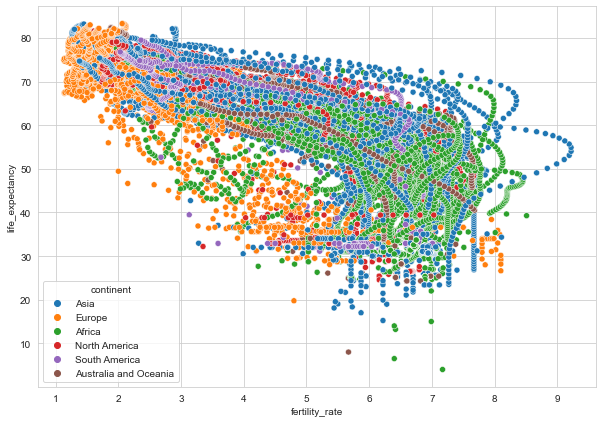

In [21]:
# all countries, colored by continent
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='fertility_rate', y='life_expectancy', hue='continent')

In [22]:
# use a loop to produce and save one plot per year
for i in df1['year'].unique():
    fig, ax1 = plt.subplots(figsize=(10,8))
    
    g = sns.scatterplot(x='fertility_rate', y='life_expectancy', 
                    hue='continent', alpha=0.5, palette=['orchid','cornflowerblue','coral','limegreen','gold', 'aqua'],
                    size=df1['population_size'], sizes=(150, 5000),
                    data=df1.loc[df1['year'] == i])

    plt.axis((0, 10, 25, 85))
    plt.title(i, fontsize=25)
    
    # adjust legend, index legend labels to only show continent labels, not population size
    h,l = g.get_legend_handles_labels()
    plt.legend(h[1:7],l[1:], loc=(0.8, 0.6), markerscale=2, labelspacing=1, title="Continent (markersize acc.\nto population size)")
    
    plt.xlabel('Fertility Rate', fontsize=16)
    plt.ylabel('Life Expectancy', fontsize=16)
    sns.despine()
    # save plot
    plt.savefig(f'{PATH}/frame_{i}.png', dpi=200)
    
     # do not display plot
    plt.close()         


## Creating gif with imageio

In [34]:
# change directory, go into output folder
%cd output
images = []

# append images
for i in range(1960, 2015):
    filename = 'frame_{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('gapminder_animated_scatterplot.gif', images, fps=5)

In [40]:
from IPython.display import HTML
HTML('<img src="output/gapminder_animated_scatterplot.gif">')

## Check for inplausible data

In [41]:
df1.query('continent == "North America" & life_expectancy < 40')

,country,year,fertility_rate,population_size,life_expectancy,continent,population_size_s
7770,Haiti,2010,3.35,9999617.0,32.2,North America,99.0


In [42]:
# this is the haiti earthquake catastrophe with > 300.000 victims in 2010